## Nitrogen Dioxide (NO2) and Weather Co-relation Study for the City of Austin, Texas 

<b> Findings for the City of Austin: </b>
    
    Based on the nitrogen dioxide and weather data from 2015 to 2019, we can see that the weather conditions does impact 
    nitrogen dioxide level specifically minimum temperature and wind speed.
    
    Following inferences can be made from the regression model used:
        
        1. A decrease in Min temperature, wind speed, cloud cover, humidity increases the nitrogen dioxide level.
        2. An decrease in pressure decreases the nitrogen dioxide level.
    
    Although based on the correlation matrix, the correlation between weather parameters and nitrogen dioxide doesn't 
    seem to be very strong but based on the Null Hypothesis, we can conclude that weather parameters like Min Temperature,
    Wind Speed, Pressure and Cloud Cover does have an impact on nitrogen dioxide and we cannot ignore them. 

In [1]:
# importing dependencies 

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the csv files created in data_cleaning_and_merging module
combined_no2_weather_data = pd.read_csv('../data/combined_no2_weather_data.csv')

In [3]:
# checking for null values
combined_no2_weather_data.isnull().sum()

date_local       0
avgtempC         0
winddirDegree    0
windspeedKmph    0
cloudcover       0
humidity         0
precipInches     0
pressure         0
visibility       0
maxtempC         0
mintempC         0
sunHour          0
NO2              0
dtype: int64

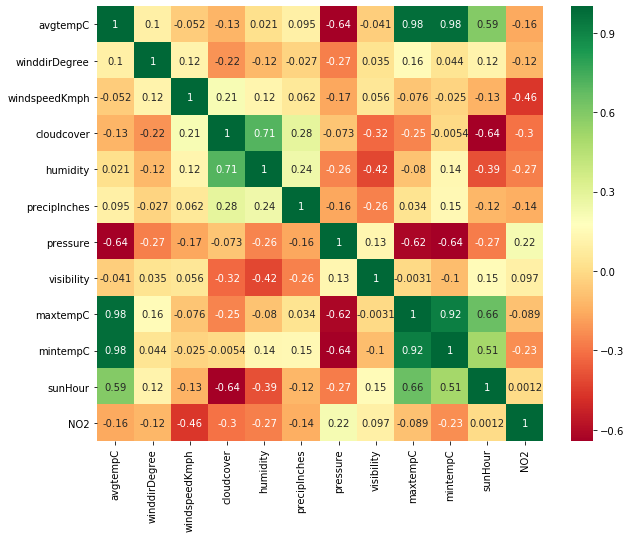

In [4]:
# graphical representation of correlation
corrmat = combined_no2_weather_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g = sns.heatmap(combined_no2_weather_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
combined_no2_weather_data.columns

Index(['date_local', 'avgtempC', 'winddirDegree', 'windspeedKmph',
       'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility',
       'maxtempC', 'mintempC', 'sunHour', 'NO2'],
      dtype='object')

In [6]:
# selecting the independent and dependent features

X = combined_no2_weather_data[['winddirDegree', 'windspeedKmph','cloudcover', 'humidity', 'pressure', 'mintempC']] ## independent features
y = combined_no2_weather_data['NO2'] ## dependent features

#### Feature Importance

In [7]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [8]:
X.head()

,winddirDegree,windspeedKmph,cloudcover,humidity,pressure,mintempC
0,70,13,98,87,1025,1
1,137,13,99,89,1019,4
2,277,11,35,78,1016,3
3,218,17,2,67,1030,2
4,93,10,1,56,1036,-2


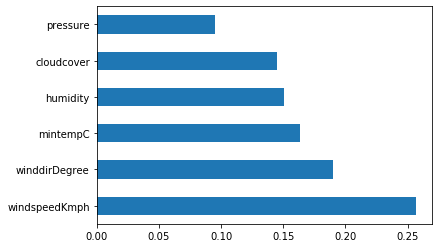

In [9]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Linear Regression

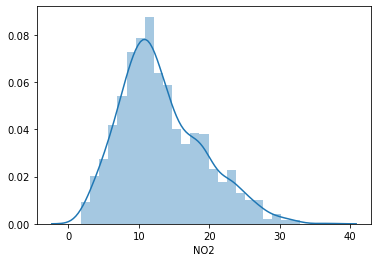

In [10]:
sns.distplot(y)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# creating an instance of linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# coefficient - slope values (m from y=mx+b) for all the independent features and y-intercept
print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [-0.01397955 -0.49463103 -0.03886376 -0.03024237 -0.12887108 -0.22641705]
intercept:  160.38270196033142


#### Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lm, X, y, cv=5)

In [17]:
# this is generlized way of finding R squared score
score.mean()

0.27719848124402413

#### Predictions

In [18]:
y_train_predictions = lm.predict(X_train)

In [19]:
y_test_predictions = lm.predict(X_test)

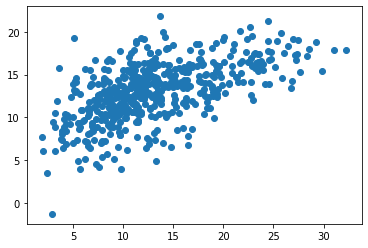

In [20]:
plt.scatter(y_test, y_test_predictions)

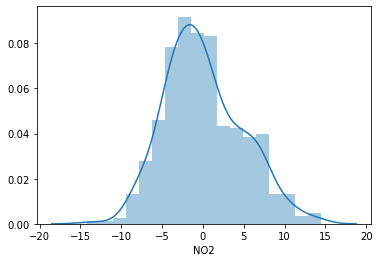

In [21]:
sns.distplot(y_test - y_test_predictions)

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predictions)))

MAE: 3.808566295660018
MSE: 22.652081780440717
RMSE: 4.759420319791132


In [24]:
from sklearn.metrics import r2_score 

In [25]:
# R2 for training data
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))

Coefficient of determination R^2 <-- on train set: 0.32481735056541006


In [26]:
# R2 for test data
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on test set: 0.34017367272290544


## Feature Selection (Scaling)

* Check direction of coefficient
* Impact of the variable/ factor on the model

In [27]:
combined_no2_weather_data.head()

,date_local,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,NO2
0,2015-01-01,2,70,13,98,87,0.2,1025,10,4,1,3.8,9.175000
1,2015-01-02,4,137,13,99,89,0.1,1019,8,5,4,3.8,9.308333
2,2015-01-03,7,277,11,35,78,0.1,1016,9,14,3,7.1,10.916667
3,2015-01-04,6,218,17,2,67,0.0,1030,10,8,2,8.7,4.763636
4,2015-01-05,3,93,10,1,56,0.0,1036,10,8,-2,8.7,20.108333


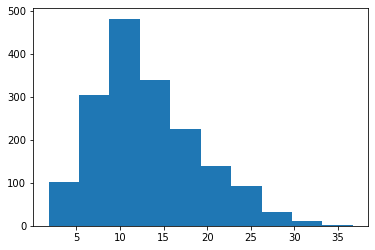

In [28]:
plt.hist(combined_no2_weather_data['NO2'])
plt.show()

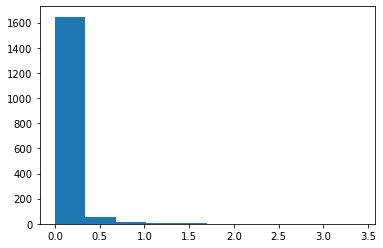

In [29]:
plt.hist(combined_no2_weather_data['precipInches'])
plt.show()

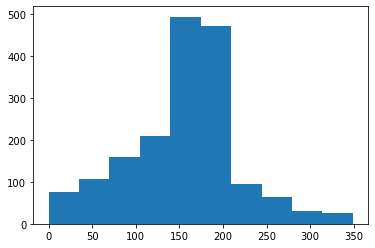

In [30]:
plt.hist(combined_no2_weather_data['winddirDegree'])
plt.show()

In [31]:
combined_no2_weather_data.columns

Index(['date_local', 'avgtempC', 'winddirDegree', 'windspeedKmph',
       'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility',
       'maxtempC', 'mintempC', 'sunHour', 'NO2'],
      dtype='object')

In [32]:
# selecting all features to begin with 
X = combined_no2_weather_data[['avgtempC', 'winddirDegree', 'windspeedKmph', 'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility', 'maxtempC', 'mintempC', 'sunHour']]
y = combined_no2_weather_data['NO2']  ## dependent features

In [33]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
result = pd.DataFrame(list(zip(model.coef_, combined_no2_weather_data.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,0.617341
mintempC,0.591094
visibility,0.510445
winddirDegree,0.453461
precipInches,0.060517
windspeedKmph,0.051498
pressure,0.041792
humidity,0.033802
avgtempC,0.017877


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)

In [36]:
stand_coef_linear_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, combined_no2_weather_data.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,4.598393
visibility,4.232569
winddirDegree,2.286212
mintempC,1.715315
windspeedKmph,1.496233
avgtempC,1.111500
precipInches,0.338255
cloudcover,0.123136
pressure,0.059633


### Implementing Linear Regression with important features based on standardized results

In [38]:
# selecting features
X = combined_no2_weather_data[['maxtempC', 'visibility', 'winddirDegree', 'mintempC', 'windspeedKmph']] #independent features
y = combined_no2_weather_data['NO2']  ## dependent features

In [39]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# coefficient for X and and the y-intercept
print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [ 0.5840224   0.10845948 -0.01536665 -0.77165247 -0.48056236]
intercept:  18.6648155532636


#### Predictive Analysis

In [42]:
y_train_predictions = lm.predict(X_train)

In [43]:
y_test_predictions = lm.predict(X_test)

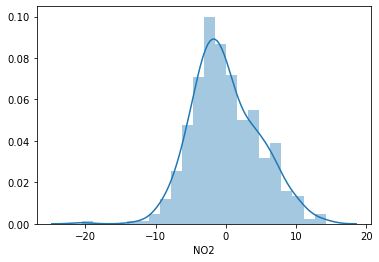

In [44]:
sns.distplot(y_test - y_test_predictions)

#### Residual Analysis

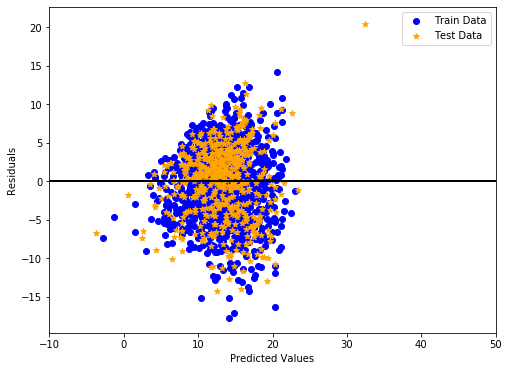

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions - y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions - y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

#### Checking for Mean Squared Error (MSE)¶

In [46]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))

MSE for training data: 21.978446243088325


In [47]:
print('MSE for training data: ', metrics.mean_squared_error(y_test, y_test_predictions))

MSE for training data:  22.749103839730093


#### Coefficient of Determination R**2

In [48]:
# R2 for training data
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))

Coefficient of determination R^2 <-- on train set: 0.3580448887338309


In [49]:
# R2 for test data
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on test set: 0.3373475435544575


### Polynomial Regression - With Multiple Variable (Multivariate)

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [52]:
polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = polyreg.predict(poly.fit_transform(X_test))

In [54]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.4364561536041356


In [55]:
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_pred))

MSE for testing data: 19.346668612182224


#### Using Polynomial Regression of degree 2 has reduced the Mean Square Error from 22.7 to 19.3
#### and has increased the R squared values from 33 to 43 on the testing data set.

#### Hypothesis testing

In [56]:
import scipy
import statsmodels.api as sm

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    NO2   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              2256.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:42:00   Log-Likelihood:                         -5338.0
No. Observations:                1734   AIC:                                  1.069e+04
Df Residuals:                    1729   BIC:                                  1.071e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [58]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-23.555614579370754


In [59]:
prediction_lasso = lasso_regressor.predict(X_test)

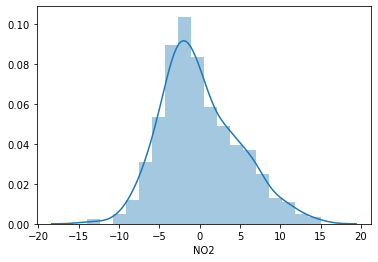

In [61]:
sns.distplot(y_test - prediction_lasso)

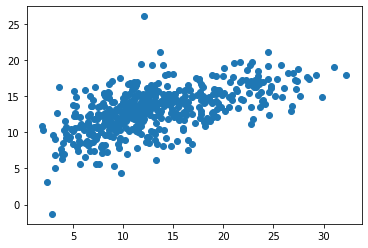

In [62]:
plt.scatter(y_test, prediction_lasso)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 3.8122543057979956
MSE: 22.83944541398543
RMSE: 4.779063236031244


### Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [65]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [66]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-23.61151382383975
